# Applying Natural Language Processing and WordClouds to Horror Books
By **Daniel Palacio** (github.com/palaciodaniel) - November 2020

### 0. Introduction

In [1]:
# You need the following group of packages installed on your system. 
# If they are not installed, please erase the '#' signs from the 
# lines of code and then Run the cells.

# !pip install wordcloud

# !pip install pillow

# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [2]:
# Loading required libraries

# Natural Language Processing
from pathlib import Path
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import random

Also, the following cell forces the Notebook to plot without scrollable frames.

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 1. FRANZ KAFKA's "Metamorphosis" (1915)

### 1. I. Finding most frequent words

The procedure is the following: first, we create a new .txt file specifically for this analysis where the copyright notice is left out, otherwise the words related to that section would get counted as well.

Once this is done, we load the edited text into a variable. Then we "isolate" every single word of the novel into tokens, making sure we are also dismissing stopwords (common words that would be useless for this procedure, like "a", "an", "in", etc).

Finally, we count all the tokens and display the 25 most common ones.

In [4]:
kafka = Path("kafka.txt").read_text() # This also closes the text file, like a Context Manager.

kafka_token_list = [word for word in word_tokenize(kafka.lower()) if word.isalpha()]

kafka_nostopwords = [token for token in kafka_token_list if token not in stopwords.words("english")]

kafka_counter25 = Counter(kafka_nostopwords).most_common(25)

print("25 Most Common words:\n\n", kafka_counter25)

25 Most Common words:

 [('gregor', 289), ('would', 191), ('room', 131), ('could', 126), ('father', 102), ('sister', 101), ('door', 87), ('mother', 87), ('back', 82), ('even', 80), ('way', 62), ('time', 59), ('one', 57), ('said', 51), ('little', 49), ('get', 44), ('still', 44), ('first', 44), ('made', 40), ('go', 40), ('see', 39), ('without', 39), ('head', 38), ('much', 38), ('chief', 37)]


### 1. II. Plotting the WordCloud

For this novel, we will use the following [Unsplash image](https://unsplash.com/photos/oV3zTK7vuP0) uploaded by Paulo Ziemer. We need it to create a mask, which is a delimited area where all the words will be placed. If this is not clear enough, it will be understood once we finally plot the word cloud.

![img](bug.jpeg)

However, in order for it to work properly we will require a small modification: to get rid of the background by replacing it with a pure white texture. This is because WordCloud is programmed so that words are not placed on white spaces. 

We can use any image editing program for this; personally I used Pinta and GIMP, both available on Linux Mint. This is the result:

![img](bug_edited.jpeg)

As for the font color, we will use an ImageColorGenerator, which takes the colors from the image and applies them to the words.

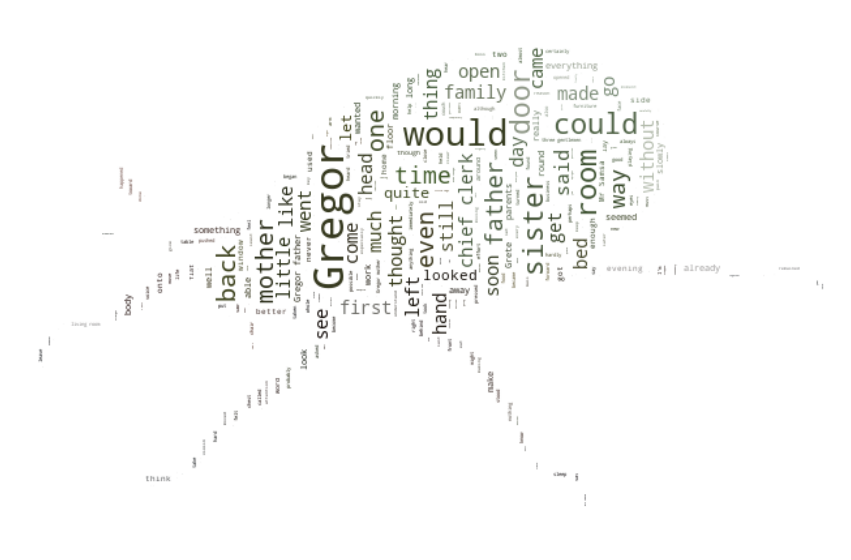

In [5]:
kafka_img = plt.imread("bug_edited.jpeg")
img_color = ImageColorGenerator(kafka_img)

# Creating the WordCloud
kafka_wordcloud = WordCloud(width = 600, height = 400, 
                            mask = kafka_img, color_func = img_color, background_color = "white", 
                            prefer_horizontal = 0.2,
                            stopwords = stopwords.words("english"),
                            max_font_size = 32, min_font_size = 1, max_words = 1000, 
                            margin = 7, random_state = 24).generate(kafka)

# Showing the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(kafka_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

-----

## 2. H. P. LOVECRAFT's "The Dunwich Horror" (1929)

### 2. I. Finding most frequent words

This is similar to what we did for the previous novel:

- Create a copy of the text file where the copyright notice is left out, to avoid counting its words as well.
- Load the edited text file into a variable.
- Tokenize every single word, without including stopwords.
- Count the token frequency, highlighting the 25 most common ones.

In [6]:
dunwich = Path("dunwich.txt").read_text()

dunwich_token_list = [word for word in word_tokenize(dunwich.lower()) if word.isalpha()]

dunwich_no_stopwords = [token for token in dunwich_token_list if token not in stopwords.words("english")]

dunwich_counter25 = Counter(dunwich_no_stopwords).most_common(25)

print("25 Most Common words:\n\n", dunwich_counter25)

25 Most Common words:

 [('whateley', 73), ('one', 70), ('armitage', 52), ('old', 49), ('seemed', 49), ('wilbur', 47), ('like', 43), ('could', 43), ('would', 40), ('dunwich', 37), ('came', 37), ('hill', 34), ('great', 32), ('though', 28), ('men', 28), ('glen', 27), ('horror', 26), ('come', 25), ('time', 25), ('even', 25), ('night', 25), ('thing', 25), ('earth', 24), ('ye', 24), ('hills', 22)]


### 2. II. Plotting the WordCloud

For this novel, we will add some complexity by using an "inverted" mask, which means that words will be displayed around an image instead of inside. 

This is the selected [Unsplash image](https://unsplash.com/photos/raDgOau5K6c), whose author is Percheck Industrie.

![img](eye.jpeg)

Again, we need to use Pinta and GIMP to edit the image by removing the parts we do not want to feature (in this case, the skin around the eye). However, since we do not want the eye to be the "container" of the words (except for the iris), we also have to invert the colors.

Also, it is extremely important to fill spacious white areas with black dots, otherwise when we plot the word cloud we will see that those parts will be filled with unesthetic dark spots. You can achieve this by using an aerosol-like pencil on GIMP.

As a final step, we will convert the image so that it is binary, that is, absolutely black and white. I used the online resource [PineTools' Threshold](https://pinetools.com/threshold-image) for this.

After applying all these changes, this is our result:

![img](eye_mask.jpg)

Now that our inverted mask is ready, we will do something else: regarding the font color, instead of a *matplotlib*'s colormap here we will use a function that allow us to select a specific color, by using the HSL color scale. 

The [following link](https://www.w3schools.com/colors/colors_hsl.asp) can be consulted if you are interested to know which colors are represented by which value, but also you can simply check this quick reference:

**HSL References: hsl(Hue, Saturation, Lightness)**

- HUE [0-360]: Chosen color.
- SATURATION [0% - 100%]: From gray to the full, vivid color.
- LIGHTNESS [0% - 100%]: From black to white.

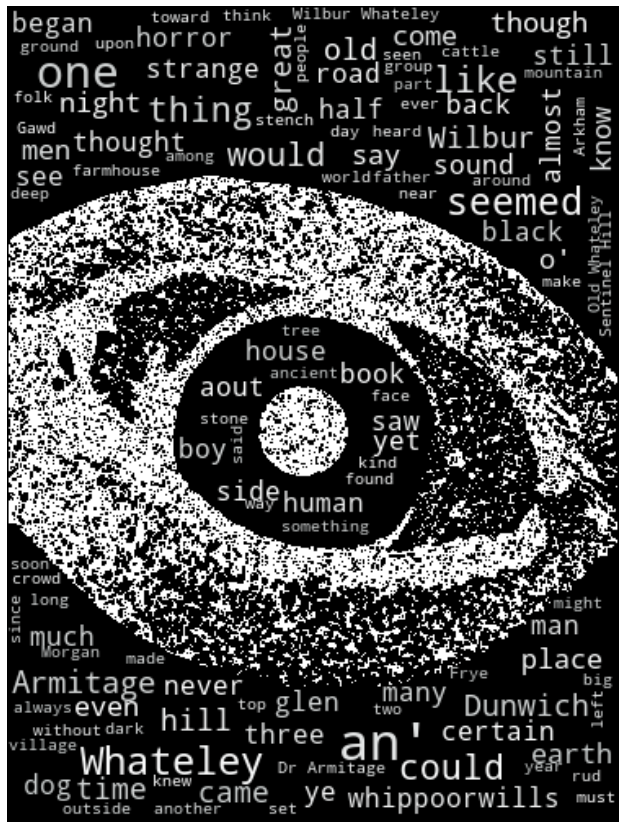

In [7]:
eye_img = plt.imread("eye_mask.jpg")

# Color function
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    # hsl(Hue, Saturation, Lightness)
    return "hsl(182, 4%%, %d%%)" % random.randint(80, 100)

dunwich_wordcloud = WordCloud(width = 600, height = 400, 
                             mask = eye_img, contour_width = 1, contour_color = "white", 
                             stopwords = stopwords.words("english"), 
                             min_font_size = 8, max_font_size = 32, max_words = 500,
                             background_color = "black", color_func = color_func,
                             random_state = 24).generate(dunwich)

plt.figure(figsize = (15,15))
plt.imshow(dunwich_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()